<a href="https://colab.research.google.com/github/NoelleI/Udacity-Deployment/blob/master/Heartbeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:


'''Step 1 Detect Skin 
this code was adapted from https://www.pyimagesearch.com/2014/08/18/skin-detection-step-step-example-using-python-opencv/
and
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/'''

# import the necessary packages
import imutils
import numpy as np
import argparse
import cv2
from matplotlib import pyplot
from google.colab.patches import cv2_imshow
# construct the argument parse and parse the arguments

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")
# if a video path was not supplied, grab the reference
# to the gray


camera = cv2.VideoCapture("IMG_3833 (1).MOV")  
n_frames = int(camera.get(cv2.CAP_PROP_FRAME_COUNT))
classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
print(n_frames)

''''change this'''


ra = []
ga = []
ba = []
box = []

# keep looping over the frames in the video
for i in range(n_frames):
    
    print(i)
	# grab the current frame
    (grabbed, frame) = camera.read()
	# if we are viewing a video and we did not grab a
	# frame, then we have reached the end of the video
	# resize the frame, convert it to the HSV color space,
	# and determine the HSV pixel intensities that fall into
	# the speicifed upper and lower boundaries
    if grabbed:
        frame = imutils.resize(frame, width = 400)
        frame = imutils.rotate(frame, -90)
        converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        skinMask = cv2.inRange(converted, lower, upper)
	# apply a series of erosions and dilations to the mask
	# using an elliptical kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
        skinMask = cv2.erode(skinMask, kernel, iterations = 2)
        skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
	# blur the mask to help remove noise, then apply the
	# mask
        skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
        skin = cv2.bitwise_and(frame, frame, mask = skinMask)

        bboxes = classifier.detectMultiScale(skin, 1.05, 8)
        print('len bboxes:', len(bboxes))
        if box == []:  
          if len(bboxes) ==0:
            print("face not detected in first frame")
            cv2_imshow(np.vstack([frame, skin]))  ##change to an assert later
          else:
            box = bboxes[0]
#choose the box most like the last frame, if more than one box. If zero boxes, use box from last frame
        else:
          if len(bboxes) ==0:
            box = box   
            print("old box used") 
          else:
           test2 = np.zeros(len(bboxes))
           for i, boxnew in enumerate(bboxes):
            [xn, yn, widthn, heightn] = boxnew 
            x2n = xn + widthn
            y2n = yn + heightn
           	# draw a rectangle mask and compare to box from previous frame
            tempn = np.zeros([frame.shape[0], frame.shape[1]])
            tempn = tempn.astype(np.uint8)
            cv2.rectangle(tempn, (xn, yn), (x2n, y2n), (255,255,255), -1)
            test = cv2.bitwise_and(temp, temp, mask = tempn)
            test2[i] = np.mean(test)
           boxt = bboxes[np.argmax(test2)]
           if boxt[3] <= width*0.9 or boxt[3] >= width*1.1:
             box = box
             print("old box used")
           else:
             box = boxt
             print("nearest box used")
	# extract
        [x, y, width, height] = box 
        x2 = x + width
        y2 = y + height
        x2 = int(x2 - 0.2*width)
        x = int(x + 0.2*width)
        #y2 = int(y2 - 0.8*height)
           	# draw a rectangle over the pixels
        temp = np.zeros([frame.shape[0], frame.shape[1]])
        cv2.rectangle(temp, (x, y), (x2, y2), (255,255,255), -1)
        temp = temp/255
        temp = temp.astype(np.uint8)
        skin = cv2.bitwise_and(skin, skin, mask = temp)



        #find the average red, green and blue in the skin
        N = 0
        r=0
        g=0
        b=0
        skinr = skin[:,:,0].reshape(-1)
        sking = skin[:,:,1].reshape(-1)
        skinb = skin[:,:,2].reshape(-1)

        #print(skinMask.shape)
        for i, pixel in enumerate(skinMask.reshape(-1)):
          if  not pixel==0:
            r += skinr[i]
            g += sking[i]
            b += skinb[i]
            N+=1
        ra += [r/N] 
        ga += [g/N]
        ba += [b/N]




	# show the skin in the image along with the mask
      
        cv2_imshow(np.vstack([frame, skin]))
# cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()

1815
0
len bboxes: 1
1
len bboxes: 1
nearest box used


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Streaming output truncated to the last 5000 lines.
len bboxes: 1
nearest box used
148
len bboxes: 0
old box used
149
len bboxes: 1
nearest box used
150
len bboxes: 1
nearest box used
151
len bboxes: 1
nearest box used
152
len bboxes: 1
nearest box used
153
len bboxes: 1
nearest box used
154
len bboxes: 1
nearest box used
155
len bboxes: 0
old box used
156
len bboxes: 1
nearest box used
157
len bboxes: 1
nearest box used
158
len bboxes: 1
old box used
159
len bboxes: 1
nearest box used
160
len bboxes: 1
nearest box used
161
len bboxes: 1
nearest box used
162
len bboxes: 1
nearest box used
163
len bboxes: 0
old box used
164
len bboxes: 0
old box used
165
len bboxes: 0
old box used
166
len bboxes: 0
old box used
167
len bboxes: 0
old box used
168
len bboxes: 0
old box used
169
len bboxes: 0
old box used
170
len bboxes: 1
nearest box used
171
len bboxes: 0
old box used
172
len bboxes: 0
old box used
173
len bboxes: 0
old box used
174
len bboxes: 0
old box used
175
len bboxes: 0
old box use

In [208]:
ra = np.array(ra)

In [209]:
np.argmin(ra)

1285

In [210]:
ra[np.argmin(ra)]

23.83124637939486

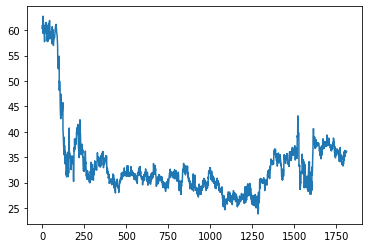

In [211]:
import matplotlib.pyplot as plt

plt.plot(ra)

In [212]:
ga = np.array(ga)
ba = np.array(ba)

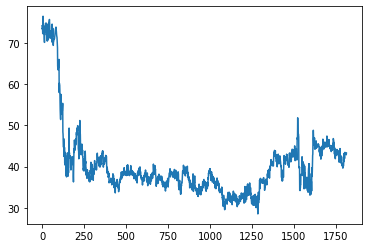

In [213]:
plt.plot(ga)

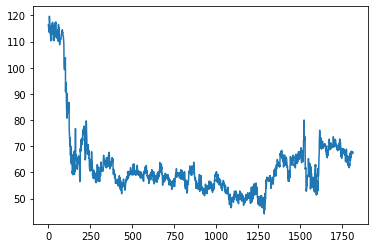

In [214]:
plt.plot(ba)

In [215]:
from sklearn.decomposition import FastICA
from scipy import signal
transformer = FastICA(n_components=3)

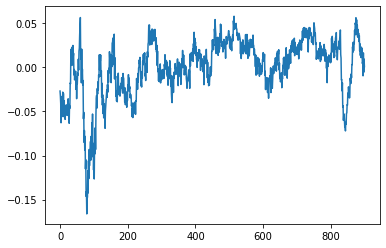

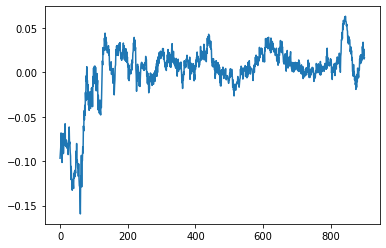

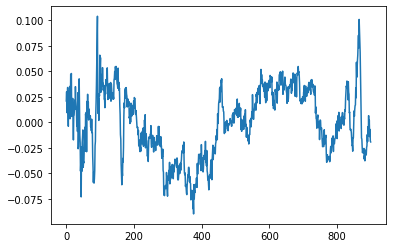

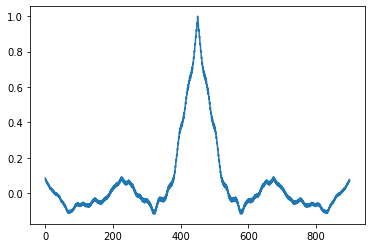

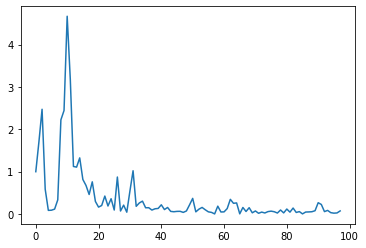

4.6686157043665375 2.4724519810008756
waiting


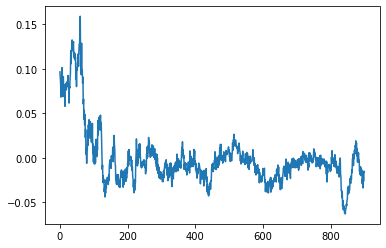

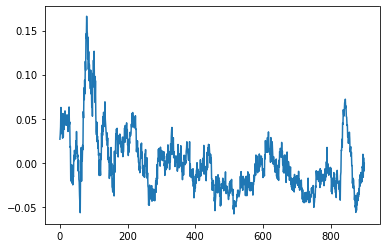

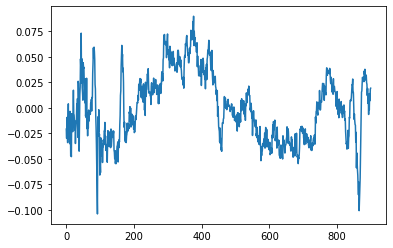

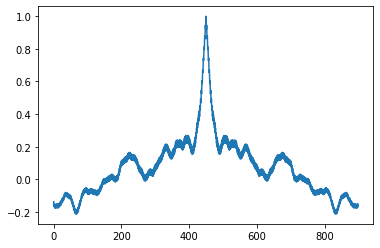

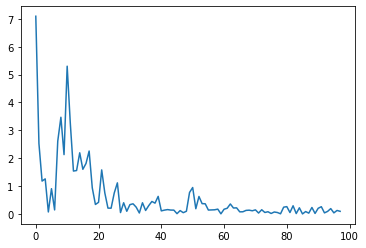

7.096181094469795 5.303480748496451
waiting


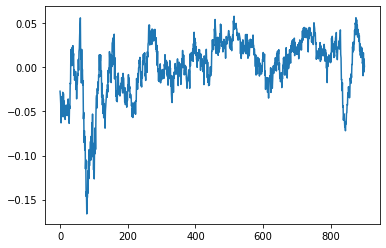

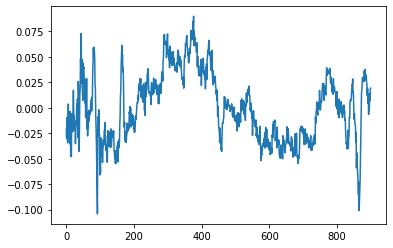

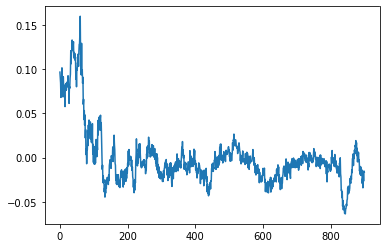

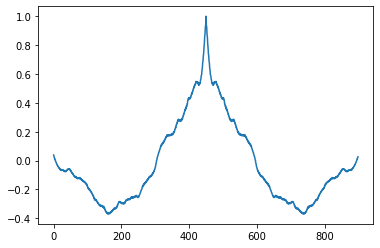

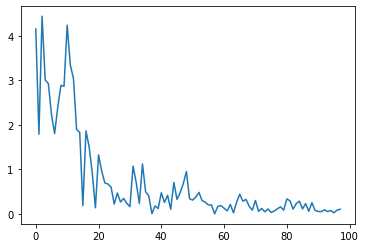

4.435519413259723 4.234799155706759
waiting


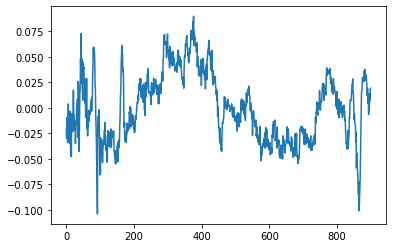

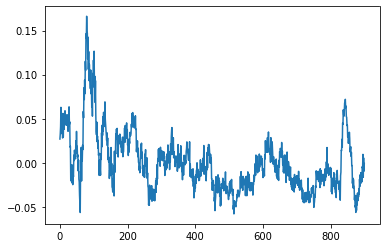

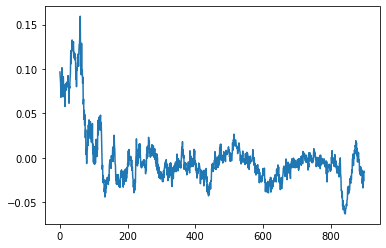

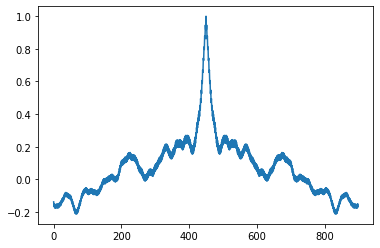

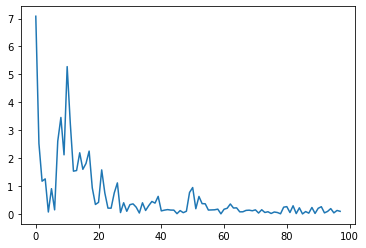

7.082334159083332 5.277861014994957
waiting


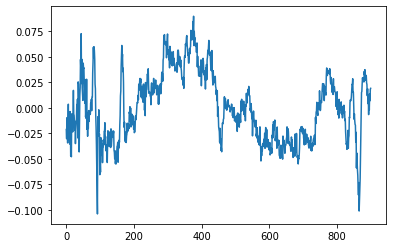

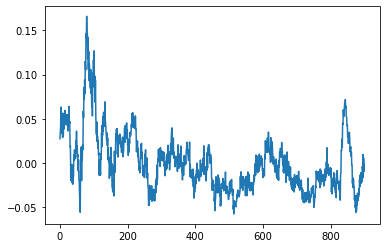

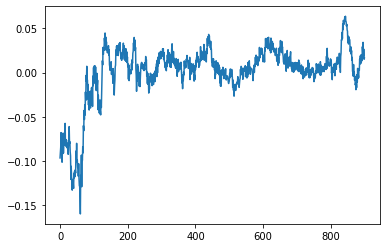

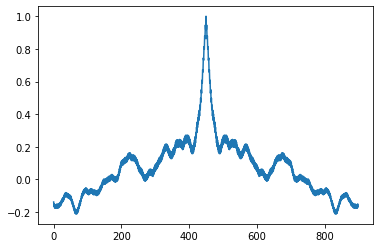

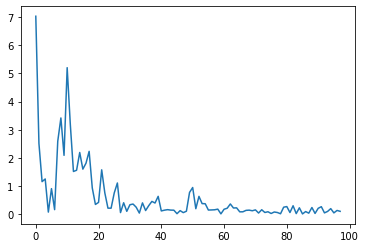

7.037064210996155 5.206788399923628
waiting


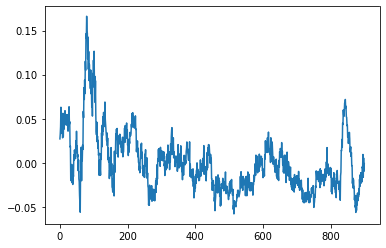

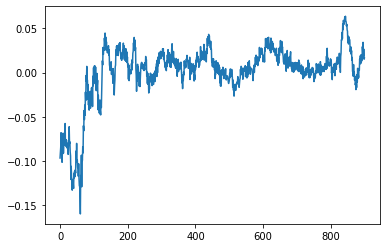

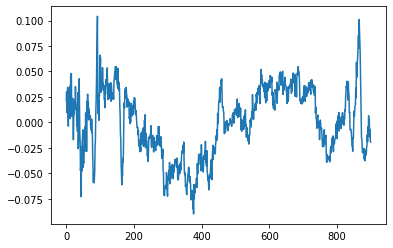

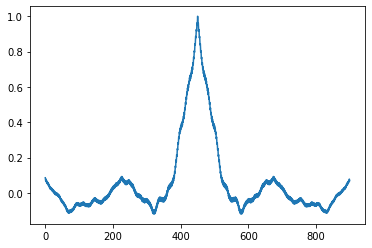

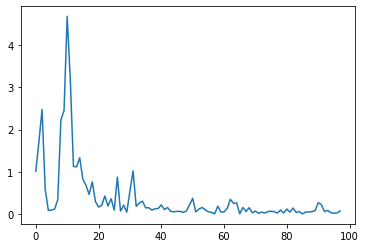

4.687020089372604 2.478294477729615
waiting


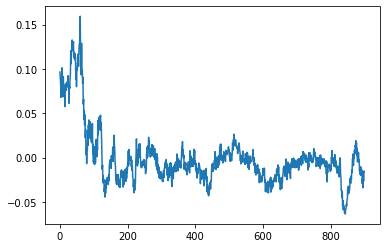

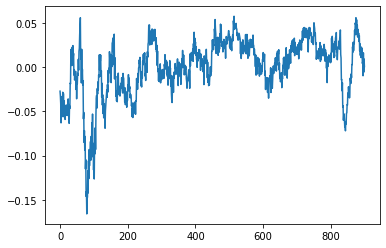

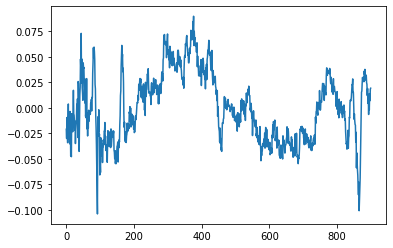

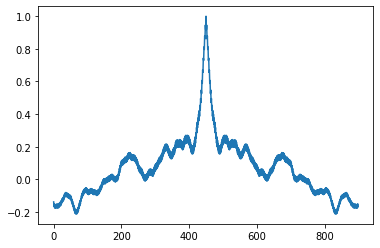

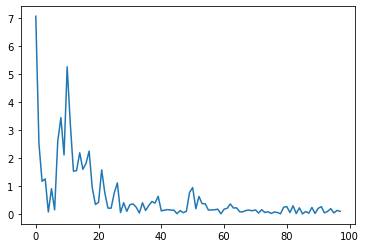

7.075975366349273 5.266354998484237
waiting


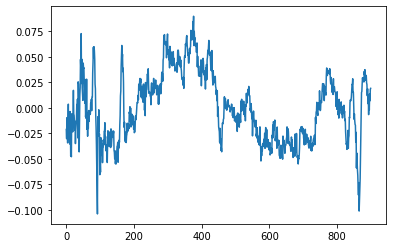

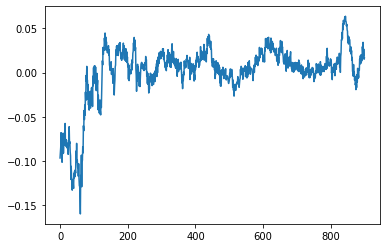

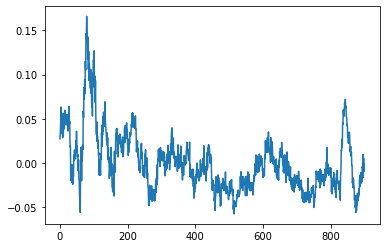

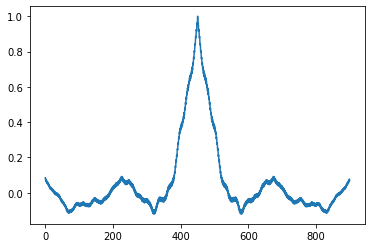

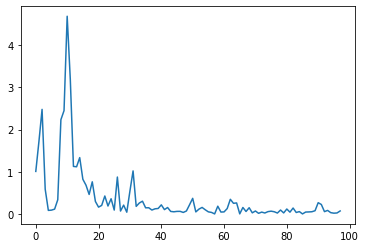

4.684425532618521 2.4784913084043843
waiting


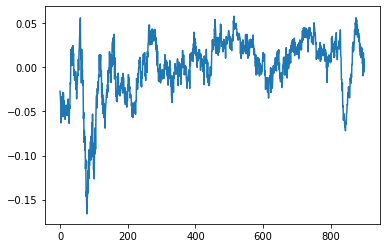

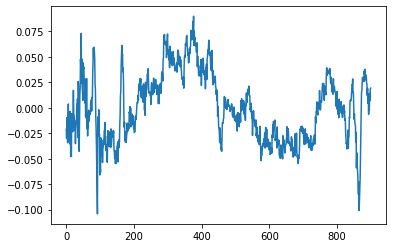

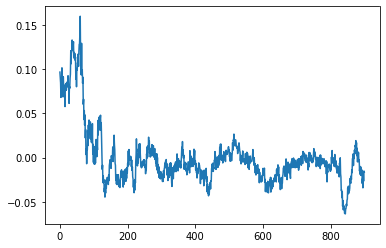

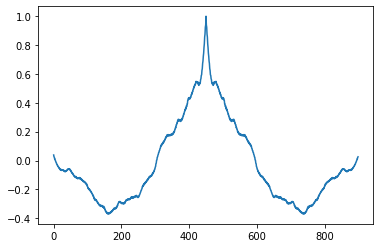

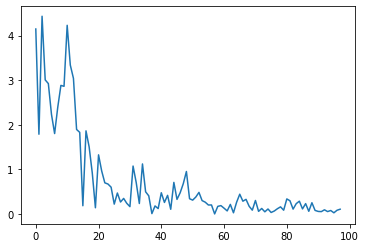

4.4343084481032164 4.230941272819822
waiting


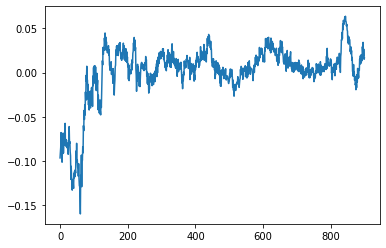

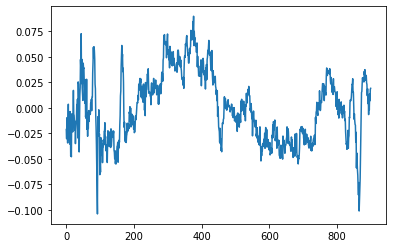

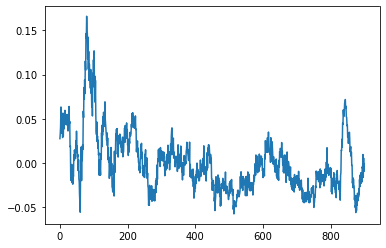

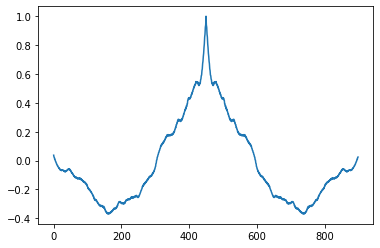

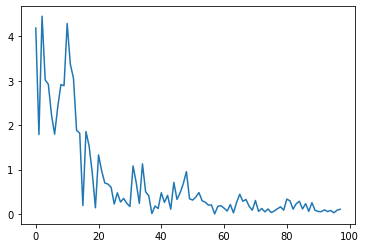

4.452859995615891 4.288758669904068
waiting


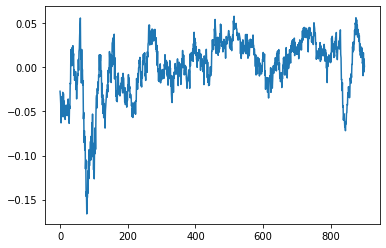

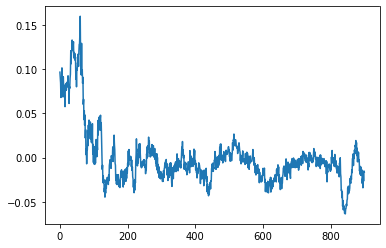

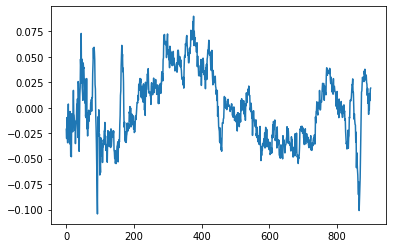

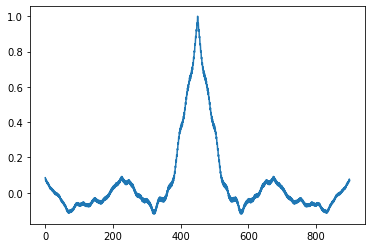

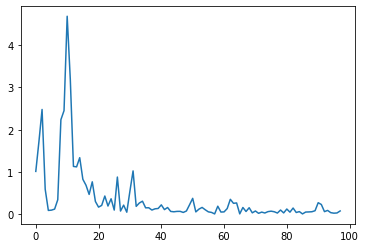

4.689462484639626 2.4789265664768942
waiting


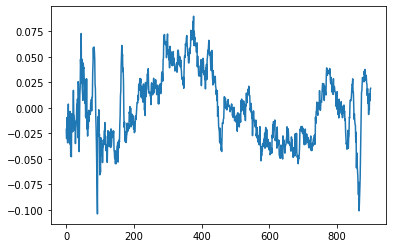

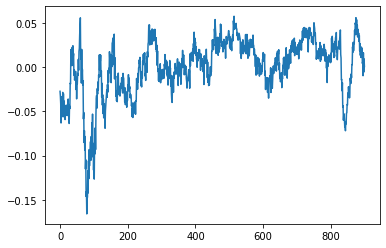

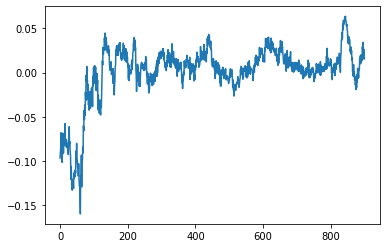

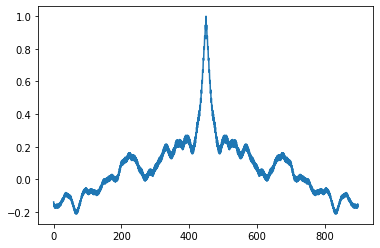

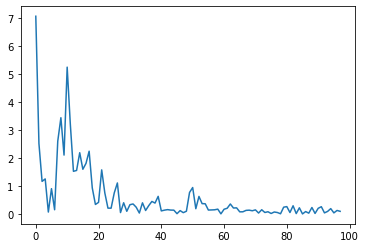

7.061634613165943 5.243360717240086
waiting


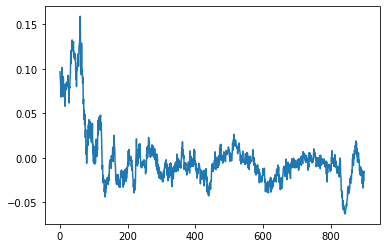

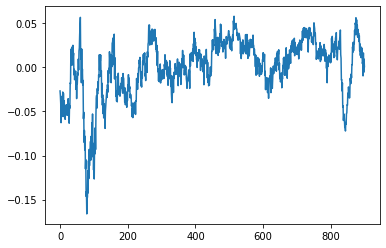

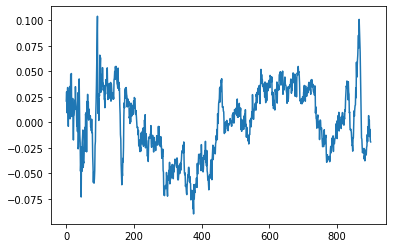

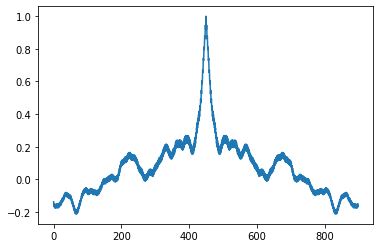

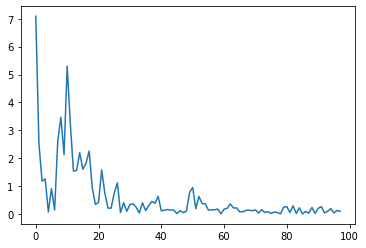

7.090747044886917 5.2986043363239155
waiting


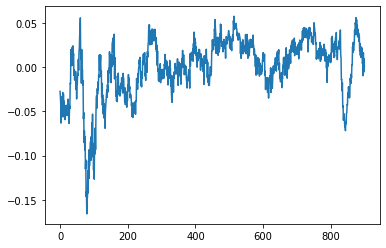

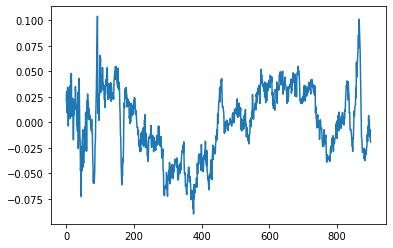

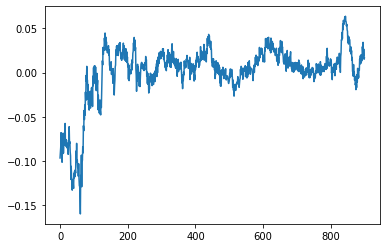

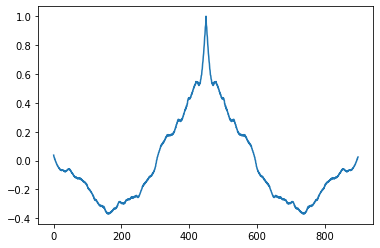

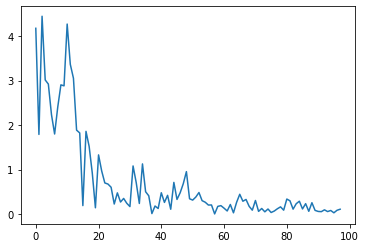

4.448140569078068 4.272208961773753
waiting


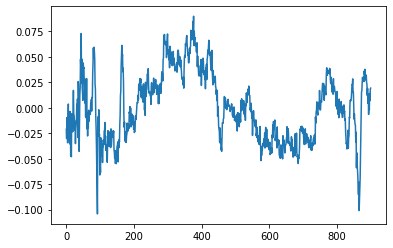

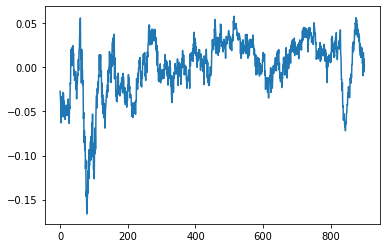

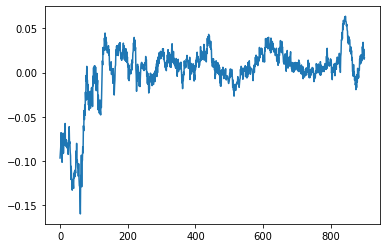

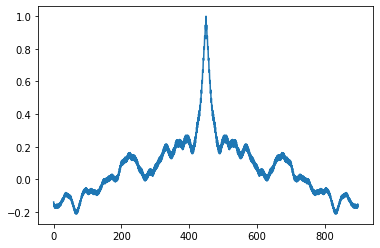

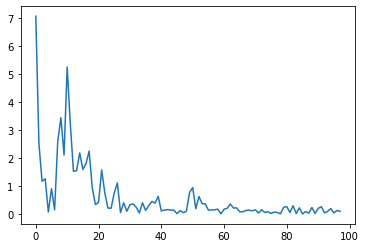

7.076693143383632 5.259642001598549
waiting


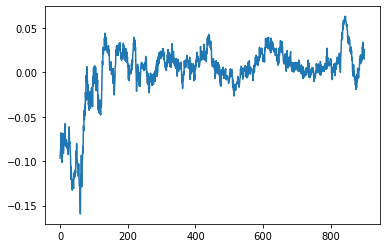

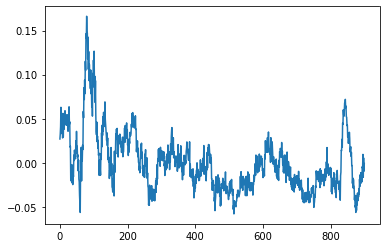

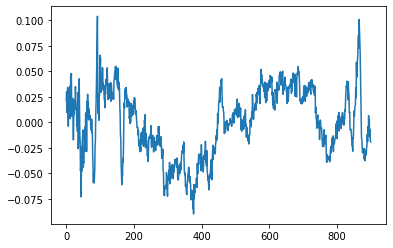

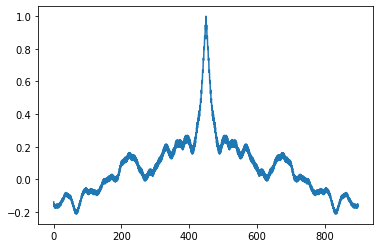

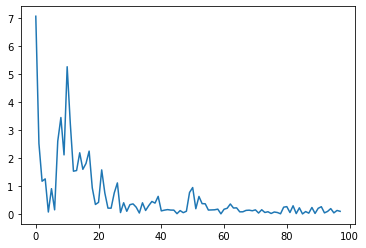

7.078369359932293 5.270401556613542
waiting


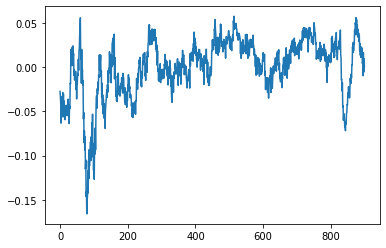

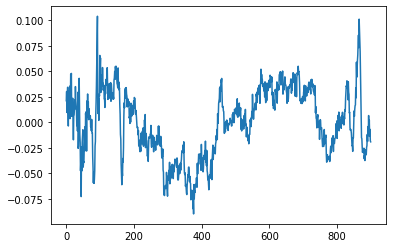

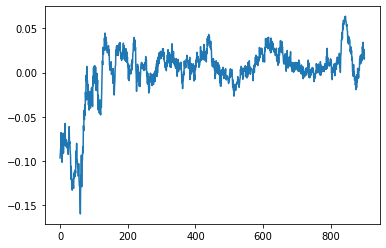

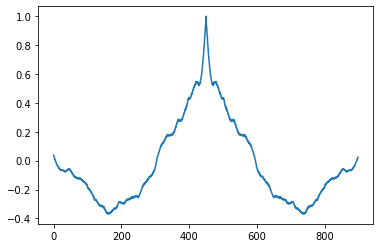

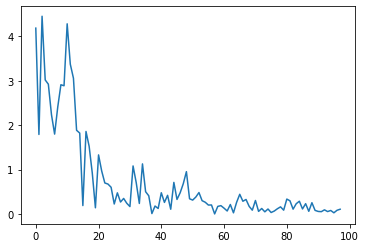

4.451530399834475 4.280973635679398
waiting


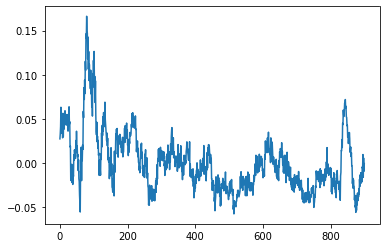

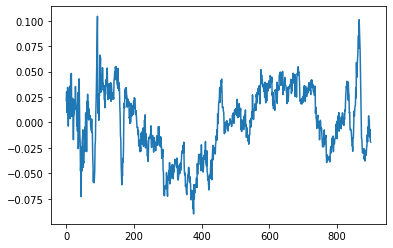

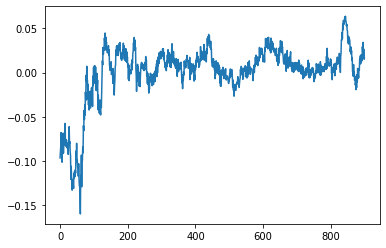

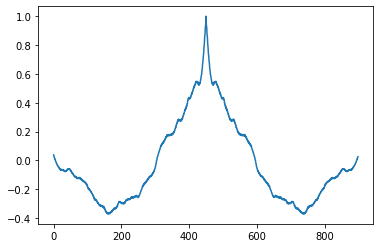

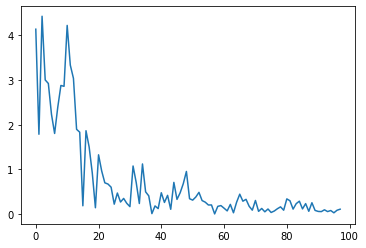

4.429475822950909 4.2240476976084445
waiting


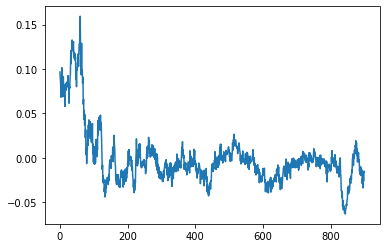

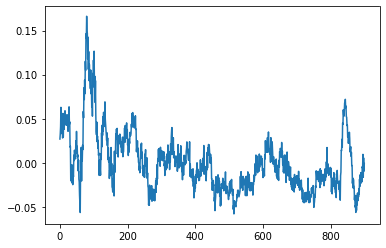

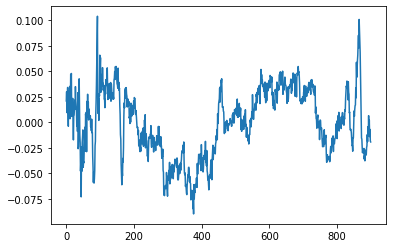

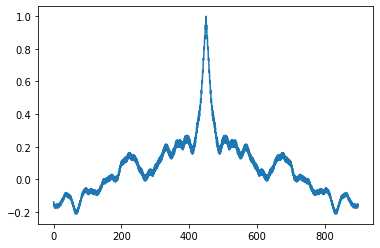

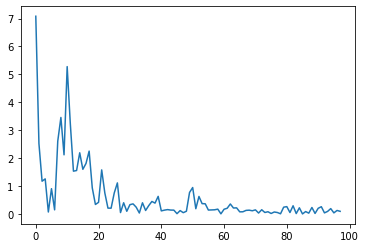

7.08191093157164 5.277573365884929
waiting


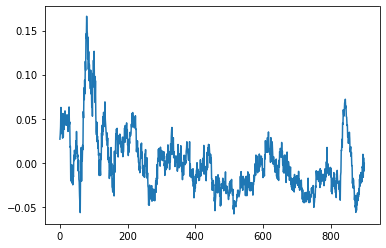

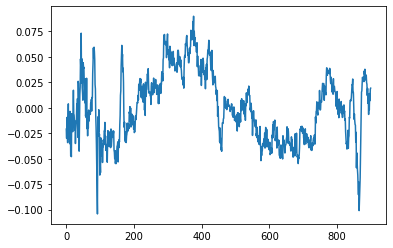

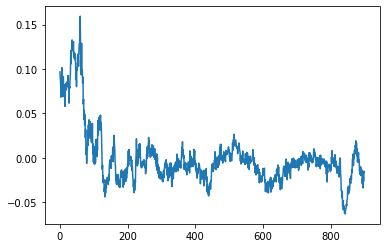

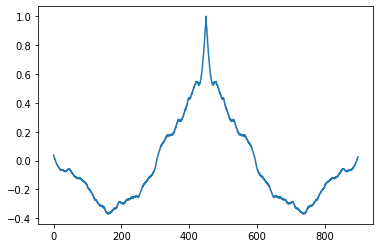

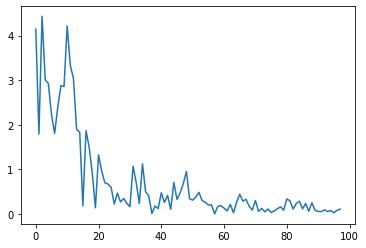

4.432267951785682 4.2159868590345395
waiting


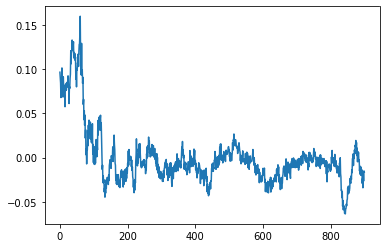

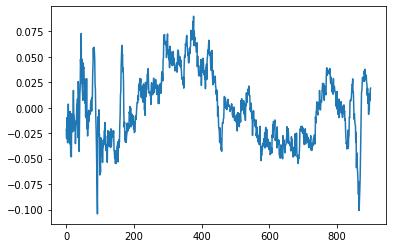

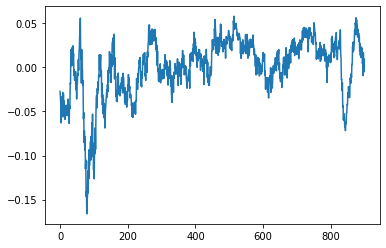

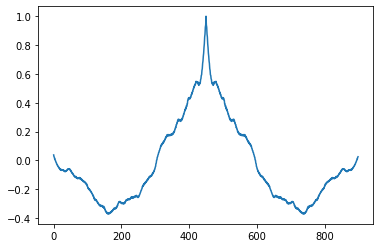

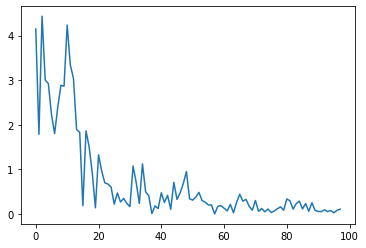

4.433877566657097 4.236111828350895
waiting


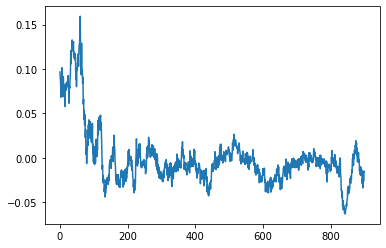

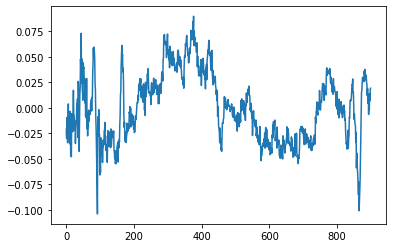

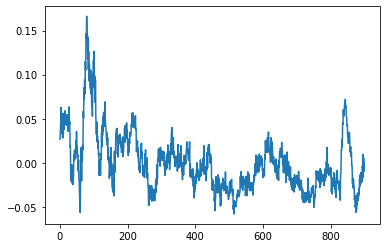

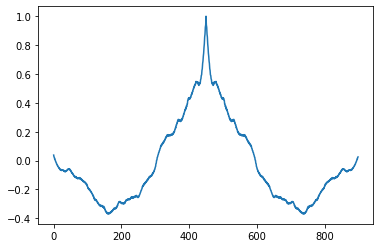

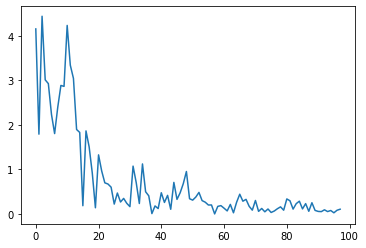

4.436796506221255 4.230768266009414
waiting


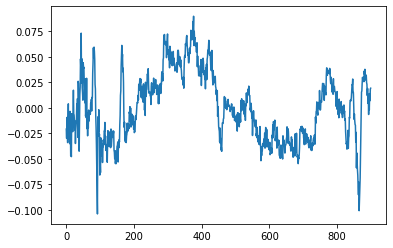

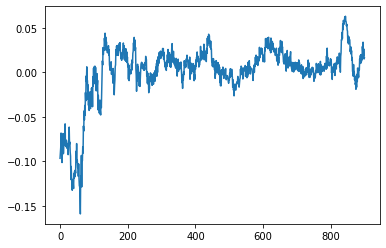

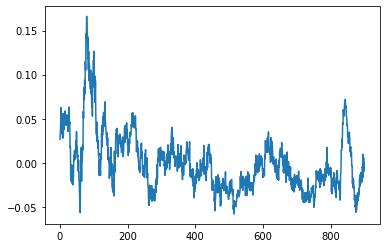

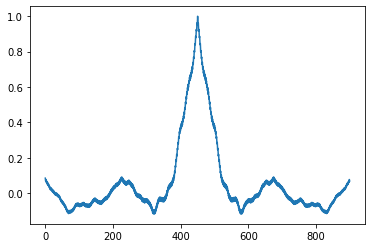

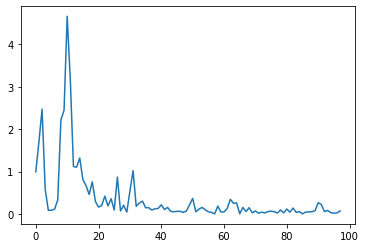

4.661054710766505 2.4699539576250453
waiting


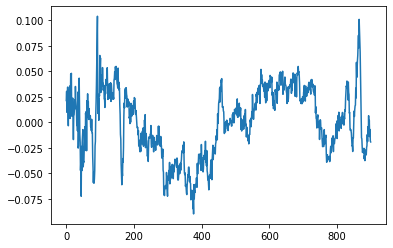

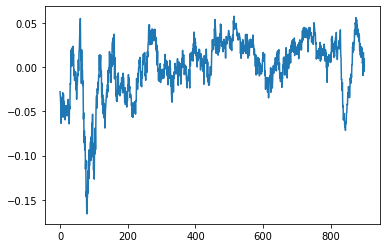

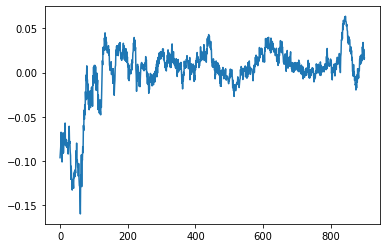

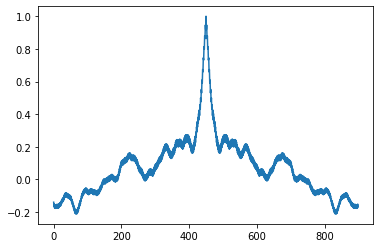

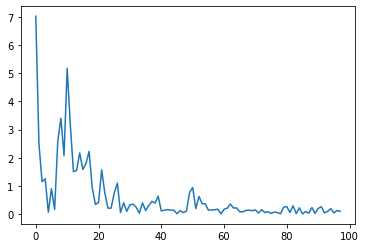

7.030512697593492 5.181118152220293
waiting


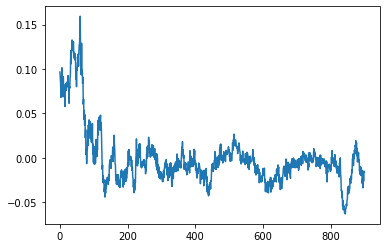

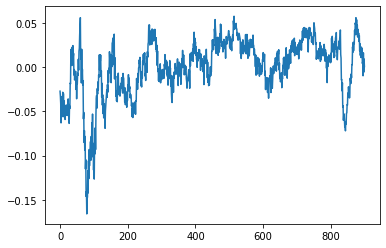

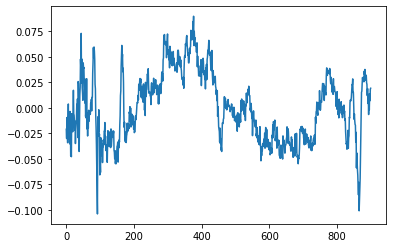

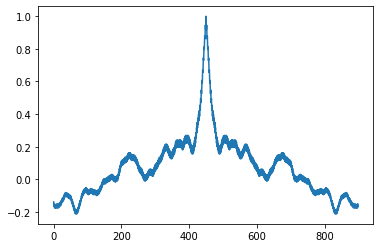

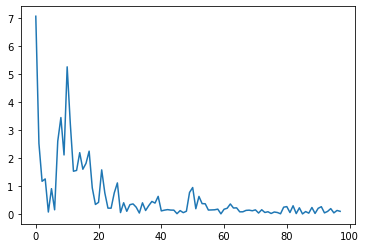

7.070542432825521 5.260846622727448
waiting


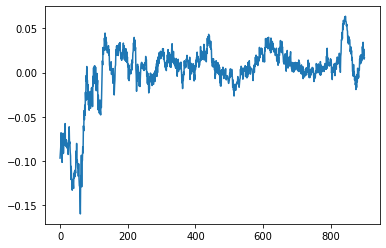

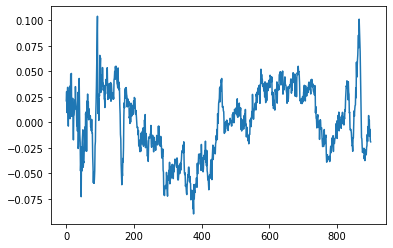

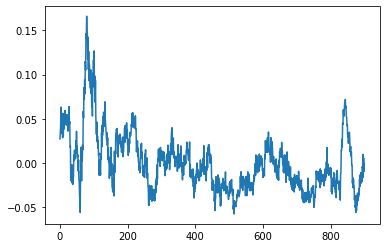

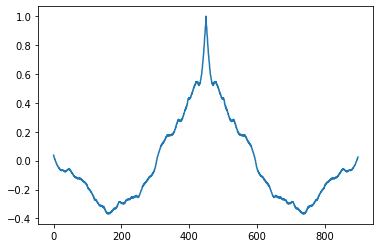

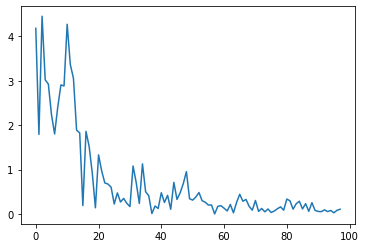

4.449022526424612 4.268746346821492
waiting


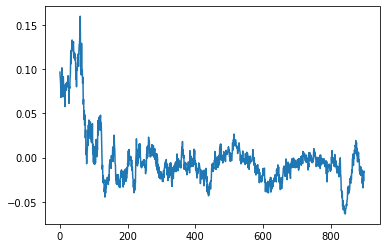

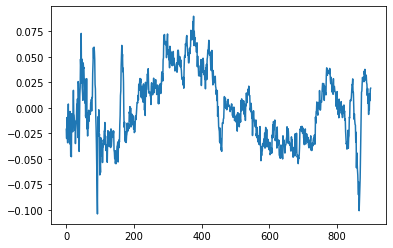

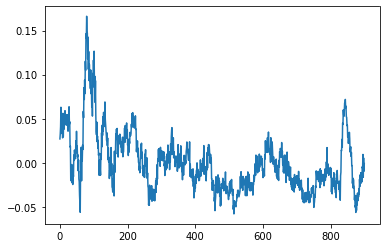

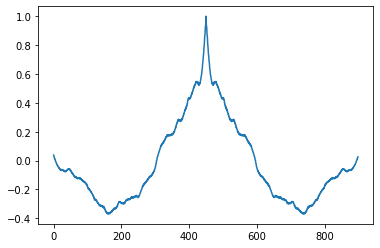

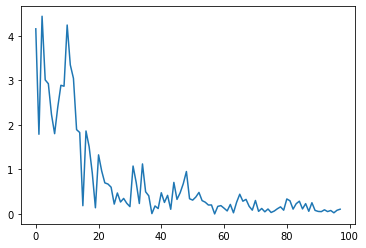

4.438065888511416 4.24080572320459
waiting


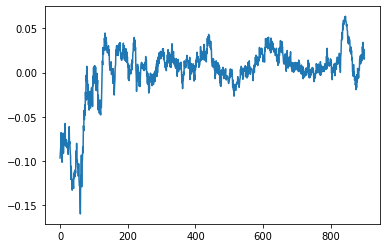

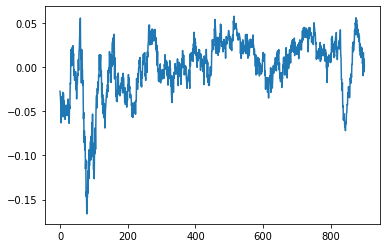

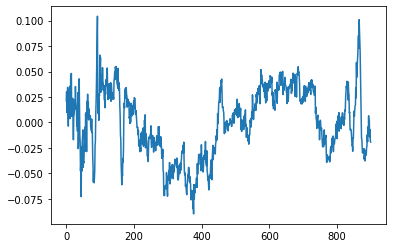

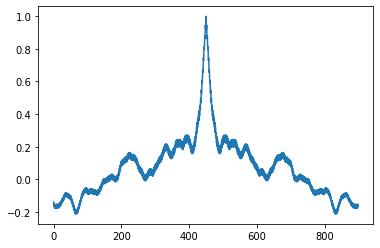

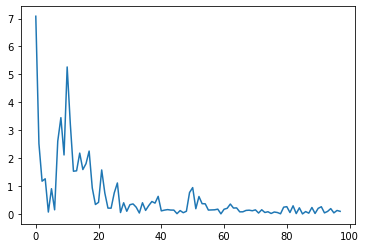

7.082402865241937 5.265315416618491
waiting


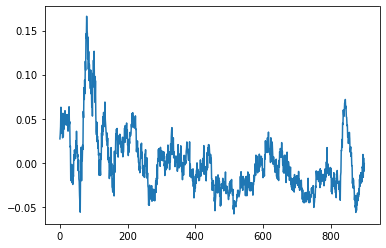

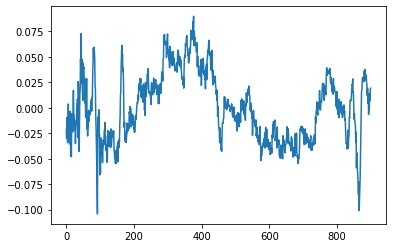

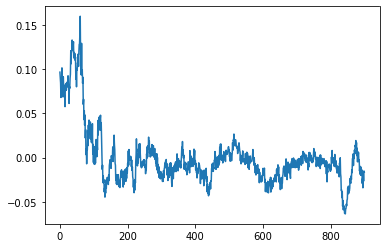

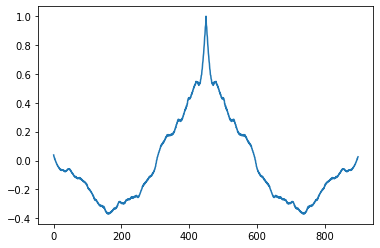

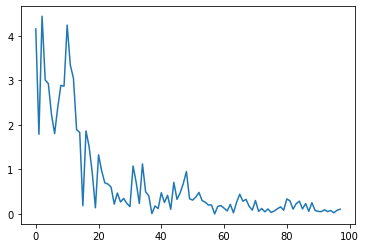

4.435537730407338 4.2367644808003995
waiting


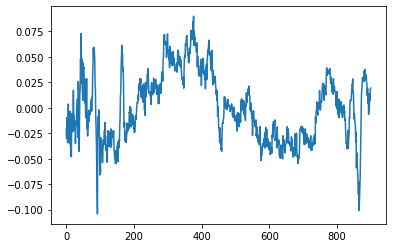

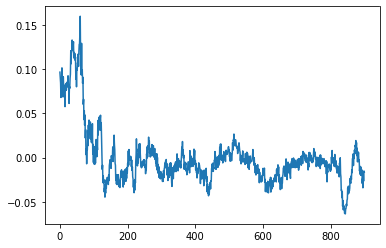

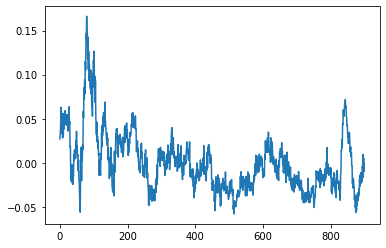

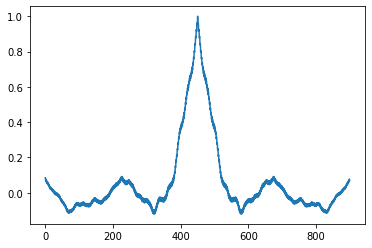

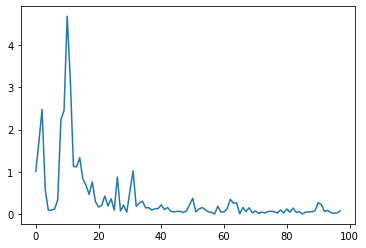

4.687859663747491 2.4785266333376454
waiting


In [216]:
#normalize over 30s windows as in Poe et al.
n30 = int((n_frames - 900)/30) #number of 30 second sliding windows
ran = np.zeros(900)
gan = np.zeros(900)
ban = np.zeros(900)
for i in range(n30):
  rav = np.mean(ra[i*30:i*30+900])
  gav = np.mean(ga[i*30:i*30+900])
  bav = np.mean(ba[i*30:i*30+900])
  rstd = np.std(ra[i*30:i*30+900])
  gstd = np.std(ga[i*30:i*30+900])
  bstd = np.std(ba[i*30:i*30+900])
  for j in range(900):
    ran[j] = (ra[j] - rav)/rstd
    gan[j] = (ga[j] - gav)/gstd
    ban[j] = (ba[j] - bav)/bstd
  X = np.array(list(zip(ran,gan,ban)))
  X_transformed = transformer.fit_transform(X)
  X_indep = X_transformed.transpose()
  plt.plot(X_indep[0])
  plt.show()
  plt.plot(X_indep[1])
  plt.show()
  plt.plot(X_indep[2])
  plt.show()
  x1 = X_indep[1]
  x1_corr = signal.correlate(x1, x1, mode='same')
  plt.plot(x1_corr)
  plt.show()
  ff = np.fft.hfft(x1_corr[:int(len(x1_corr)/2)])
  fs_n = 30/len(x1_corr/2)
  upper = int(4/fs_n)
  lower = int(0.75/fs_n)
  plt.plot((abs(ff[lower:upper])))
  plt.show()
  hr1 = int((np.argmax(abs(ff[lower:upper])) + lower))
  max1 = np.max(abs(ff[lower:upper]))
  hr2array = np.concatenate([ff[lower:hr1 - 2], ff[hr1 + 2:upper]], axis = 0)
  max2 = np.max(abs(hr2array))
  print(max1, max2)
  if max2 <= 0.5*max1:
    hr1 = hr1*60*fs_n
    print("estimated heartrate ", hr1)
  else:
    print("waiting")



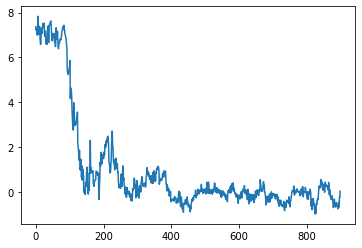

In [217]:
plt.plot(ran)

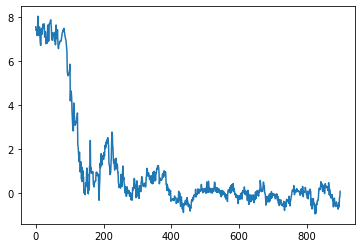

In [218]:
plt.plot(gan)

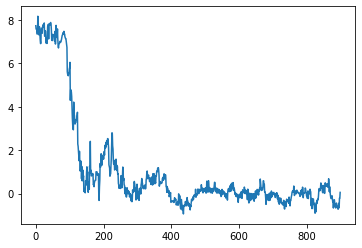

In [219]:
plt.plot(ban)